In [65]:
import pandas as pd

df = pd.read_csv("Maindata.csv")

In [2]:
df

,Capitulo,Personajes,Sentimiento,Intensidad,Texto
0,Chapter 10 - The house of count.txt,"Harry Potter, Ron Weasley, Hermione Granger",Friendship,0.7,Harry offered to share his book with both of t...
1,Chapter 10 - The house of count.txt,"Harry Potter, Hermione Granger",Annoyance,0.4,Hermione meanwhile was resolutely plowing on...
2,Chapter 10 - The house of count.txt,"Harry Potter, Ron Weasley",Friendship,0.8,Although Harry had offered to share his book w...
3,Chapter 10 - The house of count.txt,"Harry Potter, Hermione Granger",Annoyance,0.7,Hermione seemed to have no answer to this. She...
4,Chapter 10 - The house of count.txt,"Harry Potter, Hermione Granger",Friendship,0.9,We'll wait up we want to hear what he teaches...
...,...,...,...,...,...
1666,Chapter 1 - The Other Minister.txt,"Prime Minister, Fudge",Surprise,1.0,"But that murder was in the newspapers "" said t..."
1667,Chapter 1 - The Other Minister.txt,"Fudge, Prime Minister",Gratitude,0.8,It's very kind of you Prime Minister but the...
1668,Chapter 1 - The Other Minister.txt,"Fudge, Albus Dumbledore",Envy,0.9,I've been writing to Dumbledore twice a day fo...
1669,Chapter 1 - The Other Minister.txt,"Scrimgeour, Prime Minister",Anger,0.8,I thought you were happy with Shacklebolt?


In [61]:
print(df)

                                Capitulo                      Personajes  \
1670     Chapter 01 - The Other Minister               Scrimgeour, Fudge   
1649     Chapter 01 - The Other Minister           Fudge, Prime Minister   
1648     Chapter 01 - The Other Minister           Prime Minister, Fudge   
1647     Chapter 01 - The Other Minister           Fudge, Prime Minister   
1646     Chapter 01 - The Other Minister           Prime Minister, Fudge   
...                                  ...                             ...   
1180  Chapter 09 - The Half-Blood Prince       Harry Potter, Ron Weasley   
1181  Chapter 09 - The Half-Blood Prince  Harry Potter, Hermione Granger   
1182  Chapter 09 - The Half-Blood Prince  Hermione Granger, Harry Potter   
1184  Chapter 09 - The Half-Blood Prince  Hermione Granger, Harry Potter   
1216  Chapter 09 - The Half-Blood Prince  Harry Potter, Hermione Granger   

     Sentimiento  Intensidad  \
1670    Surprise         1.0   
1649        Fear       

In [8]:
import matplotlib.pyplot as plt

# Obtener los valores únicos y su frecuencia en la columna Sentimiento
sentimientos_frecuencia = df['Sentimiento'].value_counts()

# Seleccionar los top 10 sentimientos
top10_sentimientos = sentimientos_frecuencia.head(10)

# Calcular la suma de las frecuencias de los sentimientos que no están en el top 10
others = sentimientos_frecuencia[10:].sum()

# Crear un nuevo DataFrame con los top 10 sentimientos y "others"
df_torta = pd.DataFrame({'sentimiento': top10_sentimientos.index.tolist() + ['others'],
                         'frecuencia': top10_sentimientos.tolist() + [others]})

# Crear una lista de colores para los sentimientos
df_torta


,sentimiento,frecuencia
0,Friendship,337
1,Gratitude,208
2,Surprise,201
3,Anger,175
4,Fear,154
5,Happy,107
6,Disgust,86
7,Sad,65
8,Envy,42
9,Betrayal,28


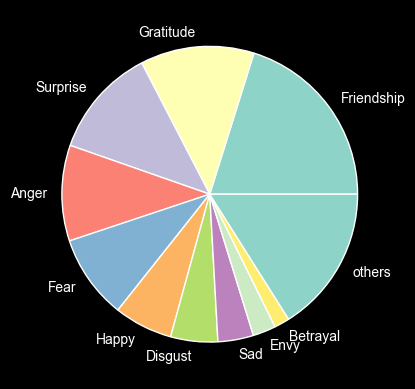

In [13]:
plt.style.use('dark_background')
plt.pie(df_torta['frecuencia'], labels=df_torta['sentimiento'])
plt.savefig("grafico_torta.png", dpi=300)
# Mostrar el gráfico

plt.show()

In [21]:
df['Numero_Capitulo'] = df['Capitulo'].str.extract(r'Chapter (\d+)')

# Agregar un cero a los números de capítulo que tienen un solo dígito
df['Numero_Capitulo'] = df['Numero_Capitulo'].str.zfill(2)

# Reemplazar la columna "Capitulo" con una versión actualizada que tiene los números de capítulo con dos dígitos
df['Capitulo'] = 'Chapter ' + df['Numero_Capitulo'] + ' - ' + df['Capitulo'].str.split(' - ').str[1]

# Eliminar la columna "Numero_Capitulo"
df = df.drop('Numero_Capitulo', axis=1)
df['Capitulo'] = df['Capitulo'].str.replace('.txt', '')
print(df)

                                Capitulo                      Personajes  \
1670     Chapter 01 - The Other Minister               Scrimgeour, Fudge   
1649     Chapter 01 - The Other Minister           Fudge, Prime Minister   
1648     Chapter 01 - The Other Minister           Prime Minister, Fudge   
1647     Chapter 01 - The Other Minister           Fudge, Prime Minister   
1646     Chapter 01 - The Other Minister           Prime Minister, Fudge   
...                                  ...                             ...   
1180  Chapter 09 - The Half-Blood Prince       Harry Potter, Ron Weasley   
1181  Chapter 09 - The Half-Blood Prince  Harry Potter, Hermione Granger   
1182  Chapter 09 - The Half-Blood Prince  Hermione Granger, Harry Potter   
1184  Chapter 09 - The Half-Blood Prince  Hermione Granger, Harry Potter   
1216  Chapter 09 - The Half-Blood Prince  Harry Potter, Hermione Granger   

     Sentimiento  Intensidad  \
1670    Surprise         1.0   
1649        Fear       

/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_30871/3230071633.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Capitulo'] = df['Capitulo'].str.replace('.txt', '')


In [22]:
grouped = df.groupby(['Capitulo', 'Sentimiento'])

# Obtener el sentimiento más repetido y la intensidad promedio
result = grouped.agg({'Intensidad': 'mean', 'Personajes': 'count'}).rename(columns={'Personajes': 'Conteo'})
result = result.reset_index().sort_values(['Capitulo', 'Conteo'], ascending=[True, False])
result = result.groupby('Capitulo').first().reset_index()[['Capitulo', 'Sentimiento', 'Intensidad']]
print(result)

                                   Capitulo Sentimiento  Intensidad
0           Chapter 01 - The Other Minister       Anger    0.963636
1                Chapter 02 - Spinner's End       Anger    0.900000
2               Chapter 03 - Will And Won't        Fear    0.857143
3              Chapter 04 - Horace Slughorn   Gratitude    0.715385
4               Chapter 06 - Draco's Detour  Friendship    0.780952
5                Chapter 07 - The Slug Club  Friendship    0.833333
6            Chapter 08 -  Victorious Snape  Friendship    0.730000
7        Chapter 09 - The Half-Blood Prince    Surprise    0.808333
8           Chapter 10 - The house of count    Surprise    0.742105
9      Chapter 11 - Hermione's helping hand       Anger    0.780000
10            Chapter 12 - Silver and opals       Anger    0.872727
11           Chapter 13 - The secret riddle  Friendship    0.660000
12               Chapter 14 - Felix felicis  Friendship    0.894118
13         Chapter 15 - The Unbreakable Vow  Fri

In [23]:
result = result.sort_values('Capitulo')

print(result)

                                   Capitulo Sentimiento  Intensidad
0           Chapter 01 - The Other Minister       Anger    0.963636
1                Chapter 02 - Spinner's End       Anger    0.900000
2               Chapter 03 - Will And Won't        Fear    0.857143
3              Chapter 04 - Horace Slughorn   Gratitude    0.715385
4               Chapter 06 - Draco's Detour  Friendship    0.780952
5                Chapter 07 - The Slug Club  Friendship    0.833333
6            Chapter 08 -  Victorious Snape  Friendship    0.730000
7        Chapter 09 - The Half-Blood Prince    Surprise    0.808333
8           Chapter 10 - The house of count    Surprise    0.742105
9      Chapter 11 - Hermione's helping hand       Anger    0.780000
10            Chapter 12 - Silver and opals       Anger    0.872727
11           Chapter 13 - The secret riddle  Friendship    0.660000
12               Chapter 14 - Felix felicis  Friendship    0.894118
13         Chapter 15 - The Unbreakable Vow  Fri

In [25]:
import numpy as np
result['Intensidad'] = np.interp(result['Intensidad'], (result['Intensidad'].min(), result['Intensidad'].max()), (0.1, 1.0))
print(result)

                                   Capitulo Sentimiento  Intensidad
0           Chapter 01 - The Other Minister       Anger    0.946818
1                Chapter 02 - Spinner's End       Anger    0.853750
2               Chapter 03 - Will And Won't        Fear    0.791071
3              Chapter 04 - Horace Slughorn   Gratitude    0.583750
4               Chapter 06 - Draco's Detour  Friendship    0.679643
5                Chapter 07 - The Slug Club  Friendship    0.756250
6            Chapter 08 -  Victorious Snape  Friendship    0.605125
7        Chapter 09 - The Half-Blood Prince    Surprise    0.719687
8           Chapter 10 - The house of count    Surprise    0.622829
9      Chapter 11 - Hermione's helping hand       Anger    0.678250
10            Chapter 12 - Silver and opals       Anger    0.813864
11           Chapter 13 - The secret riddle  Friendship    0.502750
12               Chapter 14 - Felix felicis  Friendship    0.845147
13         Chapter 15 - The Unbreakable Vow  Fri

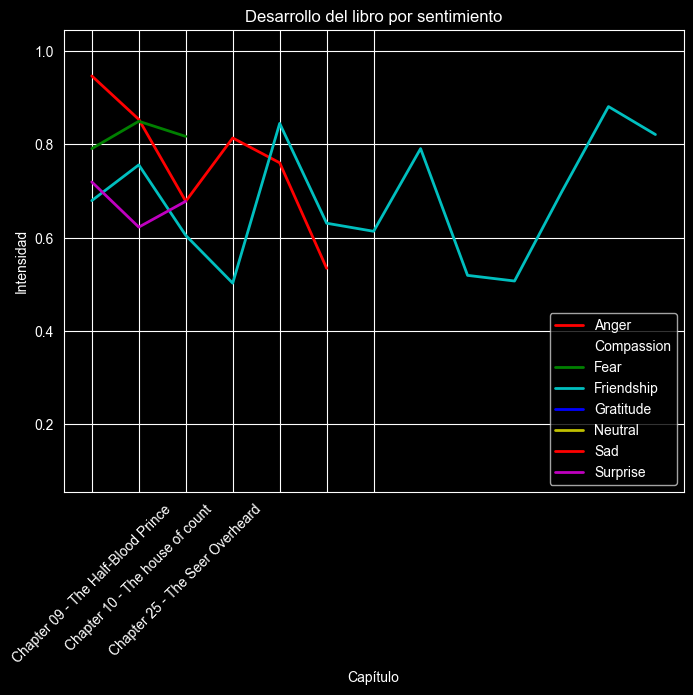

In [27]:
# crear diccionario de sentimientos y colores
sentimientos = result['Sentimiento'].unique()
colores = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'r', 'g', 'b']
diccionario_sentimientos = {sentimiento: colores[i] for i, sentimiento in enumerate(sentimientos)}

# crear gráfico de línea
fig, ax = plt.subplots(figsize=(8,6))
for sentimiento, grupo in result.groupby('Sentimiento'):
    grupo.plot(x='Capitulo', y='Intensidad', ax=ax, label=sentimiento, color=diccionario_sentimientos[sentimiento], linewidth=2)

# personalizar gráfico
ax.set_xlabel('Capítulo')
ax.set_ylabel('Intensidad')
ax.set_title('Desarrollo del libro por sentimiento')
plt.xticks(rotation=45)
plt.legend(loc='best', fontsize='medium')
plt.show()

In [28]:
def promedio_sentimientos(df):
    # Obtener promedio de sentimientos por capítulo
    result = df.pivot_table(index='Capitulo', columns='Sentimiento', values='Intensidad', aggfunc='mean')
    result = result.reset_index()
    result.columns.name = None

    # Reemplazar valores NaN por 0
    result = result.fillna(0)

    return result

In [53]:
resultsprom = promedio_sentimientos(df)
print(resultsprom)

                                   Capitulo  Admiration  Affection  Amusement  \
0           Chapter 01 - The Other Minister        0.00        0.0       0.00   
1                Chapter 02 - Spinner's End        0.00        0.0       0.80   
2               Chapter 03 - Will And Won't        0.00        0.0       0.00   
3              Chapter 04 - Horace Slughorn        0.00        0.0       0.80   
4               Chapter 06 - Draco's Detour        0.00        0.0       0.00   
5                Chapter 07 - The Slug Club        0.00        0.0       0.50   
6            Chapter 08 -  Victorious Snape        0.00        0.0       0.40   
7        Chapter 09 - The Half-Blood Prince        0.85        0.0       0.00   
8           Chapter 10 - The house of count        0.00        0.0       0.00   
9      Chapter 11 - Hermione's helping hand        0.00        0.0       0.00   
10            Chapter 12 - Silver and opals        0.00        0.0       0.00   
11           Chapter 13 - Th

In [54]:
zeros_percent = (resultsprom == 0).sum() / resultsprom.shape[0]

# Filtrar columnas que tengan menos del 10% de valores iguales a 0
resultsprom = resultsprom.loc[:, zeros_percent < 0.3]
print(resultsprom)

                                   Capitulo     Anger   Disgust      Envy  \
0           Chapter 01 - The Other Minister  0.963636  0.900000  0.900000   
1                Chapter 02 - Spinner's End  0.900000  0.840000  0.775000   
2               Chapter 03 - Will And Won't  0.980000  1.000000  0.500000   
3              Chapter 04 - Horace Slughorn  0.000000  0.000000  0.450000   
4               Chapter 06 - Draco's Detour  0.927273  0.575000  0.650000   
5                Chapter 07 - The Slug Club  0.920000  0.800000  0.000000   
6            Chapter 08 -  Victorious Snape  0.980000  0.700000  0.000000   
7        Chapter 09 - The Half-Blood Prince  0.950000  0.660000  0.400000   
8           Chapter 10 - The house of count  0.976923  0.933333  0.700000   
9      Chapter 11 - Hermione's helping hand  0.780000  0.800000  0.000000   
10            Chapter 12 - Silver and opals  0.872727  0.800000  0.550000   
11           Chapter 13 - The secret riddle  1.000000  0.000000  0.000000   

In [55]:
resultsprom

,Capitulo,Anger,Disgust,Envy,Fear,Friendship,Gratitude,Happy,Surprise
0,Chapter 01 - The Other Minister,0.963636,0.900000,0.900000,0.800000,0.000000,0.550000,0.000000,0.916667
1,Chapter 02 - Spinner's End,0.900000,0.840000,0.775000,0.833333,0.800000,0.741667,0.600000,1.000000
2,Chapter 03 - Will And Won't,0.980000,1.000000,0.500000,0.857143,0.685714,0.880000,1.000000,0.940000
3,Chapter 04 - Horace Slughorn,0.000000,0.000000,0.450000,0.966667,0.854545,0.715385,1.000000,0.760000
4,Chapter 06 - Draco's Detour,0.927273,0.575000,0.650000,0.766667,0.780952,0.733333,0.838462,0.710000
5,Chapter 07 - The Slug Club,0.920000,0.800000,0.000000,0.933333,0.833333,0.775000,0.700000,0.760000
6,Chapter 08 - Victorious Snape,0.980000,0.700000,0.000000,0.500000,0.730000,0.900000,0.825000,0.785714
7,Chapter 09 - The Half-Blood Prince,0.950000,0.660000,0.400000,0.700000,0.637500,0.855556,0.657143,0.808333
8,Chapter 10 - The house of count,0.976923,0.933333,0.700000,0.820000,0.860000,0.881818,0.000000,0.742105
9,Chapter 11 - Hermione's helping hand,0.780000,0.800000,0.000000,0.700000,0.800000,0.733333,0.833333,0.800000


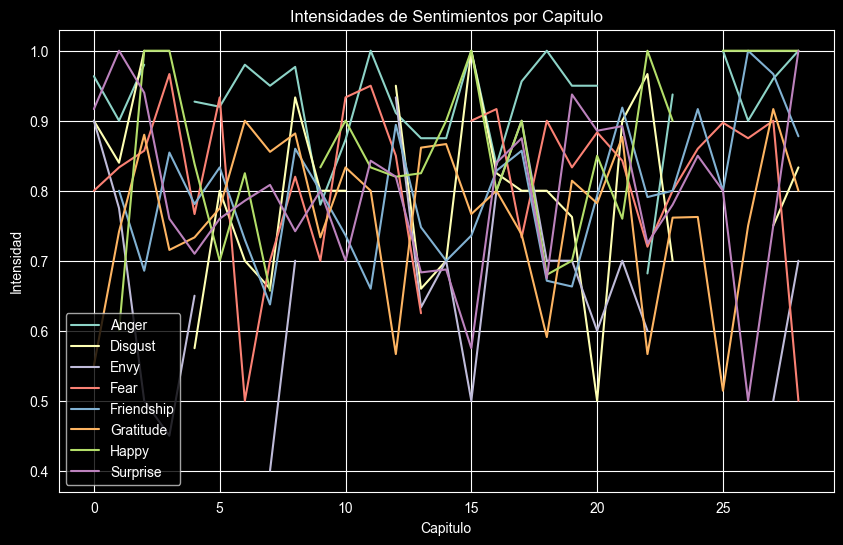

In [56]:
sentimientos = resultsprom.columns[1:]

# Crear un gráfico de líneas para cada sentimiento
resultsprom.replace(0, float("nan"), inplace=True)

# Definir tamaño de la figura
plt.figure(figsize=(10, 6))
for sentimiento in sentimientos:
    plt.plot(resultsprom.index, resultsprom[sentimiento], label=sentimiento)

# Añadir etiquetas al gráfico
plt.xlabel('Capitulo')
plt.ylabel('Intensidad')
plt.title('Intensidades de Sentimientos por Capitulo')
plt.legend()

# Mostrar el gráfico
plt.show()

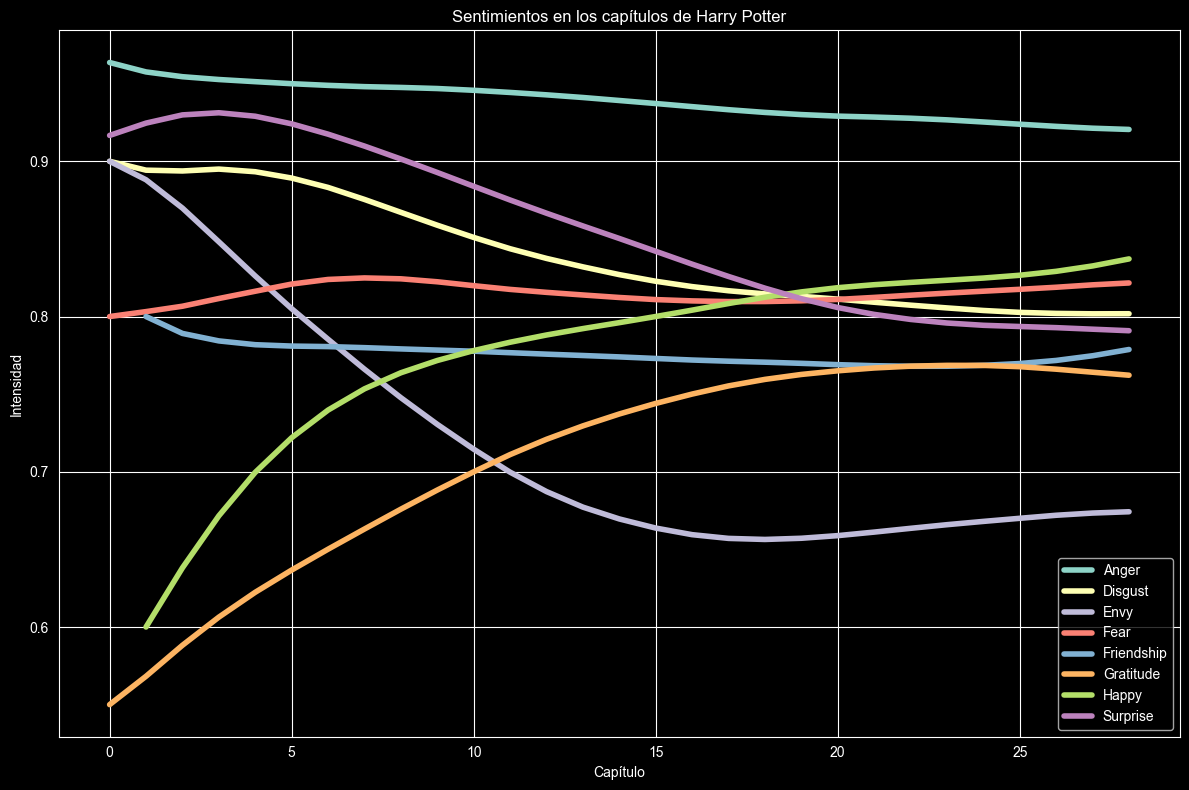

In [60]:
alpha = 0.2  # Factor de suavizado
resultsprom.iloc[:, 1:] = resultsprom.iloc[:, 1:].ewm(alpha=alpha).mean()

# Graficar los resultados
fig, ax = plt.subplots(figsize=(12, 8))
for col in resultsprom.columns[1:]:
    ax.plot(resultsprom.index, resultsprom[col], linewidth=4, label=col)

# Ajustar los límites del eje Y


# Configurar el título y las etiquetas de los ejes
ax.set_title('Sentimientos en los capítulos de Harry Potter')
ax.set_xlabel('Capítulo')
ax.set_ylabel('Intensidad')

# Mostrar la leyenda y ajustar la figura
ax.legend()
fig.tight_layout()
plt.savefig("desarrollo.png", dpi=300)
# Mostrar la gráfica
plt.show()

In [73]:
sentimiento_mas_comun = df.groupby('Personajes')['Sentimiento'].apply(lambda x: x.mode()[0]).reset_index()


In [74]:
print(sentimiento_mas_comun)

                                            Personajes Sentimiento
0                             Albus Dumbledore, Amycus  Friendship
1                       Albus Dumbledore, Draco Malfoy   Gratitude
2                             Albus Dumbledore, Fenrir        Fear
3                           Albus Dumbledore, Greyback     Disgust
4                       Albus Dumbledore, Harry Potter   Gratitude
..                                                 ...         ...
339                       Vernon Dursley, Aunt Petunia     Disgust
340  Vernon Dursley, Petunia Dursley, Albus Dumbledore       Happy
341                            Wormtail, Severus Snape        Fear
342                               Worple, Harry Potter   Gratitude
343                                   Zacharias, Coote     Disgust

[344 rows x 2 columns]


In [75]:
sentimiento_mas_comun = sentimiento_mas_comun[sentimiento_mas_comun['Personajes'].str.count(',') < 2]
print(sentimiento_mas_comun)

                           Personajes Sentimiento
0            Albus Dumbledore, Amycus  Friendship
1      Albus Dumbledore, Draco Malfoy   Gratitude
2            Albus Dumbledore, Fenrir        Fear
3          Albus Dumbledore, Greyback     Disgust
4      Albus Dumbledore, Harry Potter   Gratitude
..                                ...         ...
338  Vernon Dursley, Albus Dumbledore       Anger
339      Vernon Dursley, Aunt Petunia     Disgust
341           Wormtail, Severus Snape        Fear
342              Worple, Harry Potter   Gratitude
343                  Zacharias, Coote     Disgust

[304 rows x 2 columns]


In [76]:
sentimiento_mas_comun['Interacciones'] = df['Personajes'].value_counts().reset_index()['Personajes']

In [78]:
print(sentimiento_mas_comun)

                           Personajes Sentimiento  Interacciones
0            Albus Dumbledore, Amycus  Friendship            147
1      Albus Dumbledore, Draco Malfoy   Gratitude            123
2            Albus Dumbledore, Fenrir        Fear            100
3          Albus Dumbledore, Greyback     Disgust             83
4      Albus Dumbledore, Harry Potter   Gratitude             69
..                                ...         ...            ...
338  Vernon Dursley, Albus Dumbledore       Anger              1
339      Vernon Dursley, Aunt Petunia     Disgust              1
341           Wormtail, Severus Snape        Fear              1
342              Worple, Harry Potter   Gratitude              1
343                  Zacharias, Coote     Disgust              1

[304 rows x 3 columns]


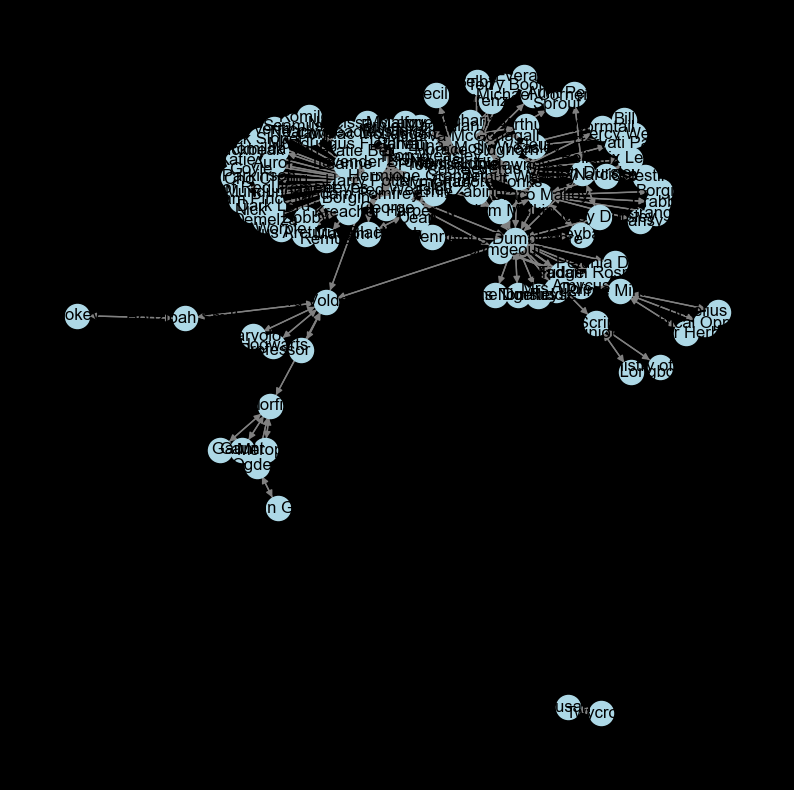

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear lista de edges a partir de la columna Personajes
edges = []
for p in sentimiento_mas_comun['Personajes']:
    personajes = p.split(', ')
    if len(personajes) > 1:
        for p1 in personajes:
            for p2 in personajes:
                if p1 != p2:
                    edges.append((p1, p2))

# Crear grafo dirigido y agregar edges
G = nx.DiGraph()
G.add_edges_from(edges)

# Graficar red
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.axis('off')
plt.show()


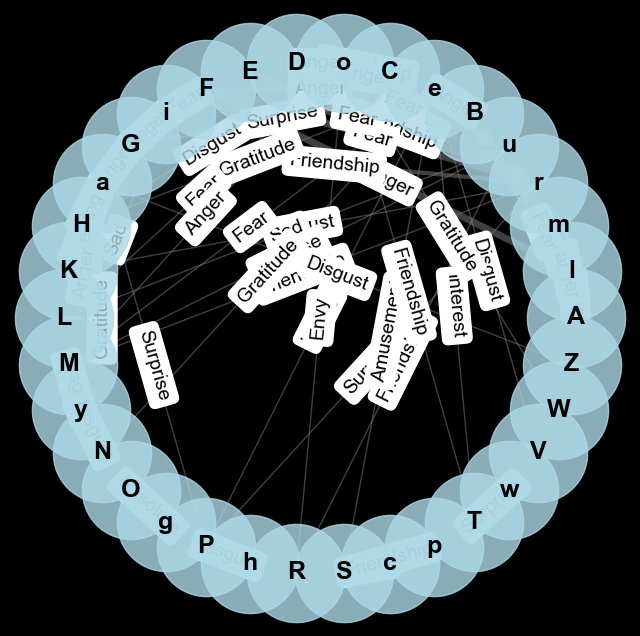

In [80]:
G = nx.DiGraph()
for _, row in sentimiento_mas_comun.iterrows():
    G.add_edge(row['Personajes'][0], row['Personajes'][1], weight=row['Interacciones'], sentiment=row['Sentimiento'])

# Obtener posiciones de nodos
pos = nx.circular_layout(G)

# Obtener lista de aristas y pesos
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

# Dibujar la red circular
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_size=5000, alpha=0.8, node_color='lightblue')
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights, edge_color='grey', alpha=0.5, arrowsize=20)
nx.draw_networkx_labels(G, pos, font_size=18, font_family='sans-serif', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'sentiment'), font_size=14, font_family='sans-serif')
ax.set_axis_off()
plt.show()

In [92]:
df_new = df['Personajes'].str.split(',', expand=True)
df_new = df_new[[0,1]]
df_new['Sentimiento'] = df['Sentimiento']
df_new['Intensidad'] = df['Intensidad']
df_new['Texto'] = df['Texto']
print(df_new)

                   0                  1 Sentimiento  Intensidad  \
0       Harry Potter        Ron Weasley  Friendship         0.7   
1       Harry Potter   Hermione Granger   Annoyance         0.4   
2       Harry Potter        Ron Weasley  Friendship         0.8   
3       Harry Potter   Hermione Granger   Annoyance         0.7   
4       Harry Potter   Hermione Granger  Friendship         0.9   
...              ...                ...         ...         ...   
1666  Prime Minister              Fudge    Surprise         1.0   
1667           Fudge     Prime Minister   Gratitude         0.8   
1668           Fudge   Albus Dumbledore        Envy         0.9   
1669      Scrimgeour     Prime Minister       Anger         0.8   
1670      Scrimgeour              Fudge    Surprise         1.0   

                                                  Texto  
0     Harry offered to share his book with both of t...  
1     Hermione  meanwhile  was resolutely plowing on...  
2     Although Harry 

In [85]:
df

,Capitulo,Personajes,Sentimiento,Intensidad,Texto
0,Chapter 10 - The house of count.txt,"Harry Potter, Ron Weasley, Hermione Granger",Friendship,0.7,Harry offered to share his book with both of t...
1,Chapter 10 - The house of count.txt,"Harry Potter, Hermione Granger",Annoyance,0.4,Hermione meanwhile was resolutely plowing on...
2,Chapter 10 - The house of count.txt,"Harry Potter, Ron Weasley",Friendship,0.8,Although Harry had offered to share his book w...
3,Chapter 10 - The house of count.txt,"Harry Potter, Hermione Granger",Annoyance,0.7,Hermione seemed to have no answer to this. She...
4,Chapter 10 - The house of count.txt,"Harry Potter, Hermione Granger",Friendship,0.9,We'll wait up we want to hear what he teaches...
...,...,...,...,...,...
1666,Chapter 1 - The Other Minister.txt,"Prime Minister, Fudge",Surprise,1.0,"But that murder was in the newspapers "" said t..."
1667,Chapter 1 - The Other Minister.txt,"Fudge, Prime Minister",Gratitude,0.8,It's very kind of you Prime Minister but the...
1668,Chapter 1 - The Other Minister.txt,"Fudge, Albus Dumbledore",Envy,0.9,I've been writing to Dumbledore twice a day fo...
1669,Chapter 1 - The Other Minister.txt,"Scrimgeour, Prime Minister",Anger,0.8,I thought you were happy with Shacklebolt?


In [95]:


def prepare_gephi_data(df, nodes_filename, edges_filename):
    # Create nodes DataFrame with unique values from columns "0" and "1"
    nodes_df = pd.DataFrame(pd.concat([df[0], df[1]]).unique(), columns=["Id"])
    nodes_df.index.name = "node_id"
    # Add "Type" column with "Person" value for all rows
    nodes_df["Type"] = "Person"
    # Write nodes DataFrame to file
    nodes_df.to_csv(nodes_filename, sep="\t", index=True)

    # Create edges DataFrame with columns "Source", "Target", "Sentimiento" and "Intensidad"
    edges_df = df.rename(columns={0: "Source", 1: "Target"})
    # Add "Type" column with "Interaction" value for all rows
    edges_df["Type"] = "Interaction"
    # Write edges DataFrame to file
    edges_df[["Source", "Target", "Sentimiento", "Intensidad", "Type"]].to_csv(edges_filename, sep="\t", index=False)


In [97]:
prepare_gephi_data(df_new, "nodes.csv", "edges.csv")

In [99]:
def contar_palabras(archivo):
    with open(archivo, 'r') as f:
        contenido = f.read()
    palabras = contenido.split()
    return len(palabras)

In [100]:
contar_palabras("Harry Potter 6.txt")

173720

In [103]:
dfnodes = pd.read_csv("nodes.csv")


KeyError: 'id'

In [105]:
nodes_df = pd.DataFrame(pd.concat([df_new[0], df_new[1]]).unique(), columns=["Id"])
print(nodes_df)

                                   Id
0                        Harry Potter
1                    Albus Dumbledore
2                        Morfin Gaunt
3                               Ogden
4                              Morfin
..                                ...
186                Political Opponent
187   Junior Minister Herbert Chorley
188                             Fudge
189                   Cornelius Fudge
190                    Prime Minister

[191 rows x 1 columns]


In [107]:
id_list = nodes_df['Id'].tolist()

In [110]:
len(set(nodes_df['Id'].dropna()))

189